In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from matplotlib import font_manager, rc

#사용하려는 OTF 폰트의 경로를 지정합니다.
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

#폰트 이름을 가져옵니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()

#폰트를 설정합니다.
rc('font', family=font_name)

In [103]:
file_path = 'C:\Python Project\Seoul_Education_Data_Competition_2024\Excel\등록외국인+현황(연령별_국적별)_20240604164015.xlsx'
df = pd.read_excel(file_path, engine='openpyxl', header=0)
df.set_index('시점', inplace=True)

df = df.replace('-', 0) #'-'을 -으로 대체
df = df.iloc[2:, :] #5~9세, 10~14세와 '계' 제외
df = df.astype('int')

df

,합계,합계.1,한국계 중국인,한국계 중국인.1,중국,중국.1,미국,미국.1,타이완,타이완.1,...,페루,페루.1,덴마크,덴마크.1,모로코,모로코.1,이라크,이라크.1,기타,기타.1
시점,,,,,,,,,,,,,,,,,,,,,
2014,3828,2357,761,226,1281,566,235,289,180,282,...,0,0,2,2,0,2,2,6,102,56
2015,4474,2507,859,239,1784,711,241,269,157,238,...,0,1,1,3,0,2,4,3,99,63
2016,5068,2874,924,300,2207,973,244,233,144,216,...,0,1,1,3,0,3,8,3,104,70
2017,5743,3256,1014,447,2652,1201,252,213,139,201,...,0,0,2,5,2,1,7,8,124,100
2018,6131,3696,1374,722,2638,1293,255,202,142,208,...,0,4,3,4,2,0,12,13,136,109
2019,6479,3953,1512,906,2706,1298,254,218,129,183,...,2,4,2,5,0,0,10,7,197,121
2020,6123,3965,1424,899,2485,1329,284,224,110,157,...,3,4,4,4,0,0,13,10,168,124
2021,6051,4161,1379,904,2321,1401,329,277,100,130,...,4,7,10,13,3,0,15,12,206,129
2022,5667,4077,1314,696,1849,1224,340,347,85,128,...,5,7,10,14,2,1,15,13,232,182


**<컬럼>** <br>
한국계 중국인, 중국, 미국, 타이완, 일본, 베트남, 몽골, 필리핀, 캐나다, 인도, 우즈베키스탄, 영국, 프랑스, 타이, 러시아(연방), 독일, 오스트레일리아, 네팔, 파키스탄, 인도네시아, 나이지리아, 말레이시아, 방글라데시, 캄보디아, 사우디아라비아, 홍콩, 뉴질랜드, 카자흐스탄, 스리랑카, 남아프리카 공화국, 미얀마, 싱가포르, 이란, 브라질, 아일랜드, 스웨덴, 이탈리아, 튀르키예, 네덜란드, 키르기스스탄, 멕시코, 스페인, 우크라이나, 스위스, 핀란드, 가나, 벨기에, 폴란드, 이집트, 오스트리아, 수단, 아르헨티나, 오만, 이스라엘, 페루, 덴마크, 모로코, 이라크, 기타

In [104]:
#전체 5~14세 합계
year = df.index.tolist()
total = df['합계'] + df['합계.1']

df_total = pd.DataFrame({
    '시점': year,
    '합계': total
})

df_total.set_index('시점', inplace=True)

df_total

,합계
시점,
2014,6185
2015,6981
2016,7942
2017,8999
2018,9827
2019,10432
2020,10088
2021,10212
2022,9744


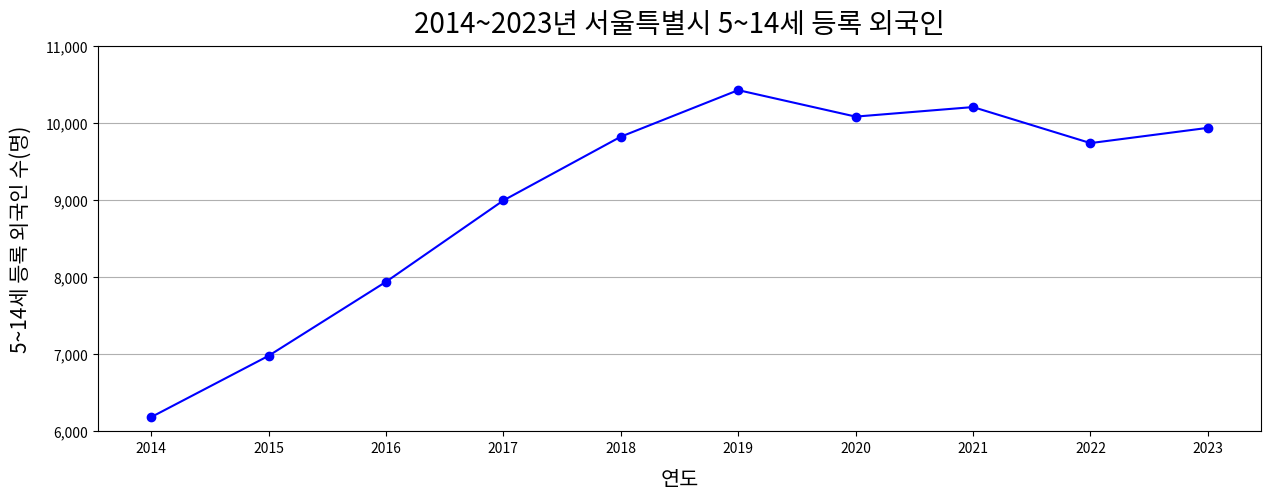

In [105]:
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm 
from matplotlib.colors import Normalize

plt.figure(figsize=(15,5))

line = plt.plot(df_total, marker='o', color='blue')

plt.title('2014~2023년 서울특별시 5~14세 등록 외국인', fontsize=20, pad=10)
plt.xlabel('연도', fontsize=15, labelpad=10)
plt.ylabel('5~14세 등록 외국인 수(명)', fontsize=15, labelpad=10)
plt.ylim(6000, 11000)

#천 단위 쉼표 추가 함수
def comma(x, pos):
    return f'{int(x):,}'

#y축 값에 천 단위 쉼표 추가
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma))

plt.grid(axis='y')  #가로선만 그리드 표시

plt.show()

In [106]:
#df_shape: (10, 120) → 인덱스: 0 ~ 119

df_country = df.copy()

#for(시작, 끝+1)
for i in range(2, df_country.shape[1]): #열: '한국계 중국인' ~ '기타'
    #짝수 인덱스: 5~9세
    #홀수 인덱스: 10~14세
    if i % 2 == 0:
        col = df_country.columns[i] #5~9세 컬럼명 대입
        col_nxt = df_country.columns[i + 1] #10~14세 컬럼명 대입
        df_country[col + ' 합계'] = df_country[col] + df_country[col_nxt]   #(5~9세 값) + (10~14세 값) 대입

#원하는 컬럼 인덱스만 추출하여 변수 df_country에 대입
iloc = []   #배열 생성

for i in range(df.shape[1], df_country.shape[1]):   #열: '한국계 중국인 합계' ~ '기타 합계'
    iloc.append(i)  #배열에 인덱스 값 추가

df_country = df_country.iloc[:, iloc]   #각 날라별 5~14세 합한 값 컬럼만 추출

#df_country 컬럼명 재설정: '합계' 삭제
col_list = []

for i in range(2, df.shape[1]):
    if i % 2 == 0:
        col_list.append(df.columns[i])  #배열에 원소 추가

df_country.columns = col_list   #컬럼명 재설정

df_country

,한국계 중국인,중국,미국,타이완,일본,베트남,몽골,필리핀,캐나다,인도,...,오스트리아,수단,아르헨티나,오만,이스라엘,페루,덴마크,모로코,이라크,기타
시점,,,,,,,,,,,,,,,,,,,,,
2014,987,1847,524,462,529,80,186,73,66,97,...,3,8,5,0,11,0,4,2,8,158
2015,1098,2495,510,395,481,89,239,69,55,103,...,2,17,3,3,14,1,4,2,7,162
2016,1224,3180,477,360,497,115,314,71,52,111,...,4,17,1,18,11,1,4,3,11,174
2017,1461,3853,465,340,461,121,407,71,40,110,...,5,21,1,11,14,0,7,3,15,224
2018,2096,3931,457,350,419,156,469,68,42,127,...,0,20,0,3,15,4,7,2,25,245
2019,2418,4004,472,312,389,178,556,68,46,126,...,0,22,1,4,12,6,7,0,17,318
2020,2323,3814,508,267,367,177,577,66,48,125,...,3,22,0,5,16,7,8,0,23,292
2021,2283,3722,606,230,365,181,570,63,51,151,...,2,27,4,5,19,11,23,3,27,335
2022,2010,3073,687,213,335,225,667,99,50,178,...,3,27,5,16,24,12,24,3,28,414


In [107]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2014 to 2023
Data columns (total 59 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   한국계 중국인    10 non-null     int32
 1   중국         10 non-null     int32
 2   미국         10 non-null     int32
 3   타이완        10 non-null     int32
 4   일본         10 non-null     int32
 5   베트남        10 non-null     int32
 6   몽골         10 non-null     int32
 7   필리핀        10 non-null     int32
 8   캐나다        10 non-null     int32
 9   인도         10 non-null     int32
 10  우즈베키스탄     10 non-null     int32
 11  영국         10 non-null     int32
 12  프랑스        10 non-null     int32
 13  타이         10 non-null     int32
 14  러시아(연방)    10 non-null     int32
 15  독일         10 non-null     int32
 16  오스트레일리아    10 non-null     int32
 17  네팔         10 non-null     int32
 18  파키스탄       10 non-null     int32
 19  인도네시아      10 non-null     int32
 20  나이지리아      10 non-null     int32
 21  말레이시아      10 non-

In [108]:
df_country.describe()

,한국계 중국인,중국,미국,타이완,일본,베트남,몽골,필리핀,캐나다,인도,...,오스트리아,수단,아르헨티나,오만,이스라엘,페루,덴마크,모로코,이라크,기타
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,...,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1784.400000,3324.900000,539.000000,313.300000,419.000000,153.000000,476.700000,75.400000,49.90000,132.700000,...,2.500000,20.000000,2.50000,7.800000,16.100000,5.600000,11.600000,2.200000,18.600000,268.000000
std,541.523612,704.093499,88.177851,84.405174,68.760454,49.549078,190.575765,14.645439,7.23341,33.436673,...,1.581139,5.477226,2.12132,6.196773,5.043147,5.274677,9.442222,1.316561,8.030497,89.205132
min,987.000000,1847.000000,457.000000,204.000000,335.000000,80.000000,186.000000,63.000000,40.00000,97.000000,...,0.000000,8.000000,0.00000,0.000000,11.000000,0.000000,4.000000,0.000000,7.000000,158.000000
25%,1283.250000,3099.750000,473.250000,239.250000,365.500000,116.500000,337.250000,68.000000,46.50000,110.250000,...,2.000000,17.500000,1.00000,3.250000,12.500000,1.000000,4.750000,2.000000,12.000000,186.500000
50%,1977.000000,3526.000000,509.000000,326.000000,404.000000,166.500000,512.500000,70.000000,49.50000,125.500000,...,3.000000,20.500000,2.00000,5.000000,14.500000,5.000000,7.000000,2.500000,20.000000,268.500000
75%,2236.250000,3843.250000,585.500000,357.500000,476.000000,180.250000,575.250000,72.500000,51.75000,145.000000,...,3.000000,22.000000,4.75000,12.500000,18.250000,10.000000,19.250000,3.000000,25.000000,330.750000
max,2418.000000,4004.000000,687.000000,462.000000,529.000000,225.000000,782.000000,106.000000,66.00000,199.000000,...,5.000000,27.000000,5.00000,18.000000,25.000000,14.000000,28.000000,4.000000,28.000000,414.000000


In [109]:
df_country_T = df_country.T
df_country_T['평균'] = df_country_T.mean(axis=1)
df_country_T.head()

시점,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,평균
한국계 중국인,987,1098,1224,1461,2096,2418,2323,2283,2010,1944,1784.4
중국,1847,2495,3180,3853,3931,4004,3814,3722,3073,3330,3324.9
미국,524,510,477,465,457,472,508,606,687,684,539.0
타이완,462,395,360,340,350,312,267,230,213,204,313.3
일본,529,481,497,461,419,389,367,365,335,347,419.0


[]

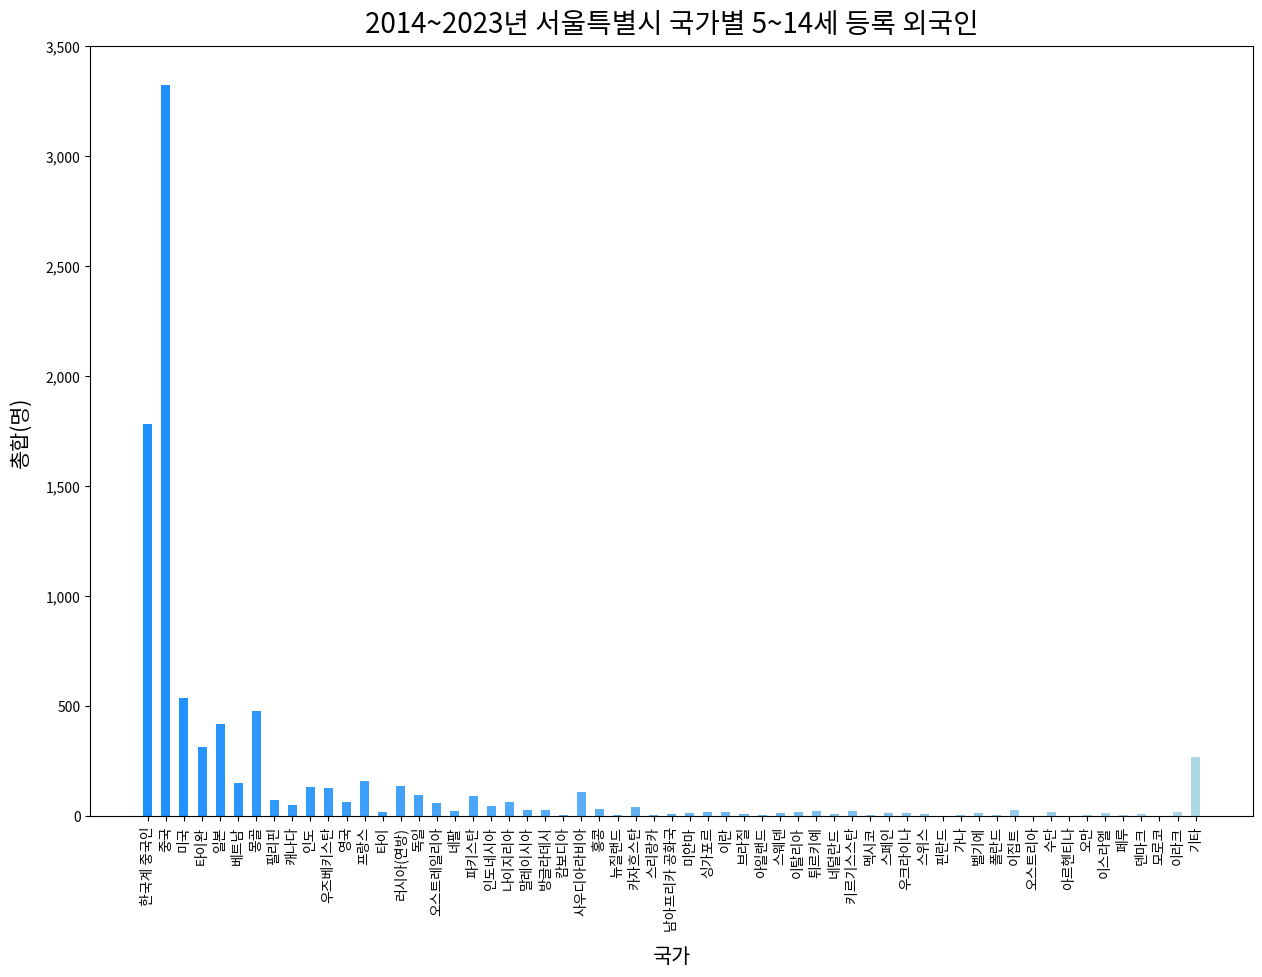

In [117]:
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm 
from matplotlib.colors import Normalize

#그래프 크기
plt.figure(figsize=(15, 10))

#x축
x = df_country_T.index.to_list()

#막대 그래프 너비 설정(기본값: 0.8)
bar_width = 0.5

#색상
start_color = np.array([30,144,255]) / 255
end_color = np.array([173,216,230]) / 255

#각 막대의 색상 설정
num_bars = len(x)
colors = [(1 - i / (num_bars - 1)) * start_color + (i / (num_bars - 1)) * end_color for i in range(num_bars)]

#막대 그래프 생성
bars = plt.bar(x, df_country_T['평균'], color=colors, width=bar_width)

#타이틀
plt.title('2014~2023년 서울특별시 국가별 5~14세 등록 외국인', fontsize=20, pad=10)

#x축
plt.xlabel('국가', labelpad=10, fontsize=15)
plt.xticks(x, rotation=90)
plt.ylabel('총합(명)', labelpad=10, fontsize=15)
plt.ylim((0, 3500))

#천 단위 쉼표 추가 함수
def comma(x, pos):
    return f'{int(x):,}'

#y축 값에 천 단위 쉼표 추가
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma))

plt.plot()

In [111]:
#'평균' 내림차순
df_country_T['평균'].sort_values(ascending=False)

중국           3324.9
한국계 중국인      1784.4
미국            539.0
몽골            476.7
일본            419.0
타이완           313.3
기타            268.0
프랑스           161.5
베트남           153.0
러시아(연방)       136.9
인도            132.7
우즈베키스탄        126.3
사우디아라비아       112.2
독일             95.3
파키스탄           93.7
필리핀            75.4
영국             64.1
나이지리아          63.4
오스트레일리아        58.7
캐나다            49.9
인도네시아          44.7
카자흐스탄          42.5
홍콩             31.7
이집트            29.3
말레이시아          27.3
방글라데시          26.7
튀르키예           24.5
네팔             23.1
키르기스스탄         21.7
수단             20.0
타이             19.4
이란             19.1
이라크            18.6
이탈리아           18.1
싱가포르           17.3
우크라이나          16.9
이스라엘           16.1
스페인            15.0
미얀마            14.7
벨기에            13.2
스웨덴            12.8
브라질            12.3
덴마크            11.6
네덜란드           11.5
스위스             9.5
남아프리카 공화국       9.0
오만              7.8
뉴질랜드            7.0
캄보디아            6.3
가나              6.1


In [122]:
df_china = df_country.iloc[:, :2]  #'한국계 중국인', '중국'만 구성

#'한국계 중국인', '중국' 전년도 대비 증감세 값 담을 배열
#시작은 0부터: 행 개수 맞추기 위해
china_value1 = [0]
china_value2 = [0]

for i in range(0, df_country.shape[0]-1):   #df_country.shape[0]으로 하면 행 개수 +1로 안 맞음 -> range(0,9), 8까지
    rst1 = df_china['한국계 중국인'][i+1] - df_china['한국계 중국인'][i]    #전년도 대비 증감세 값 -> 마지막: 8+1로 인덱스 9(2023년도 행)까지 추출
    china_value1.append(rst1)

    rst2 = df_china['중국'][i+1] - df_china['중국'][i]
    china_value2.append(rst2)

df_china['한국계 중국인 변화'] = china_value1
df_china['중국 변화'] = china_value2

df_china = df_china.iloc[1:, 2:] #0값 행 제외, '변화' 열로만 데이터 재구성
df_china.columns = ['한국계 중국인', '중국인']
df_china

,한국계 중국인,중국인
시점,,
2015,111,648
2016,126,685
2017,237,673
2018,635,78
2019,322,73
2020,-95,-190
2021,-40,-92
2022,-273,-649
2023,-66,257


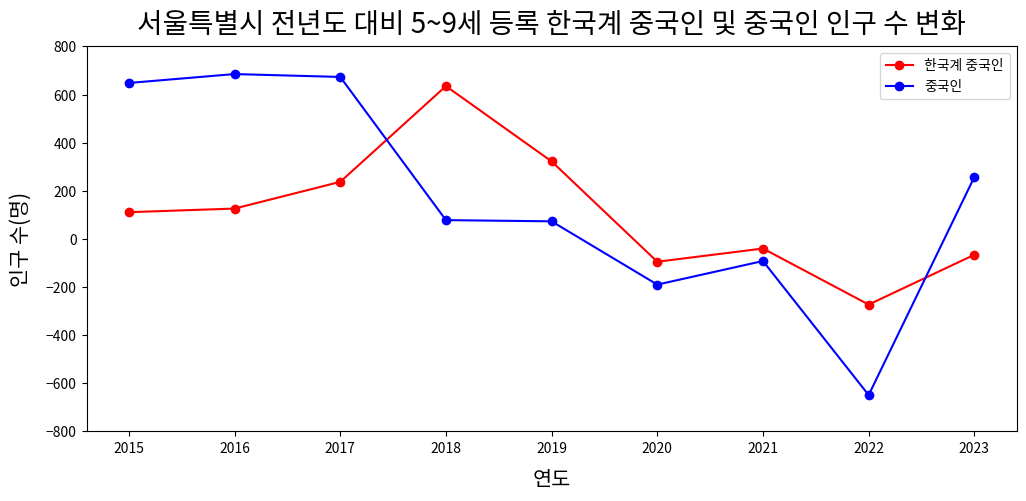

In [134]:
plt.figure(figsize=(12,5))

x = df_china.index.tolist()

plt.plot(x, df_china['한국계 중국인'], marker='o', color='red', label='한국계 중국인')
plt.plot(x, df_china['중국인'], marker='o', color='blue', label='중국인')

plt.title('서울특별시 전년도 대비 5~9세 등록 한국계 중국인 및 중국인 인구 수 변화', fontsize=20, pad=10)	#pad: 여백 크기

plt.xlabel('연도', fontsize=15, labelpad=10)	#labelpad: 여백 크기
plt.ylabel('인구 수(명)', fontsize=15, labelpad=10)	#labelpad: 여백 크기
plt.ylim(-800, 800)

plt.legend()

plt.show()